In [2]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [3]:
import pandas as pd

df = pd.read_csv("gaz.csv", parse_dates=["tarih"], sep=";")
print(df.head())

       tarih  tuketim m3
0 2010-01-01   685629430
1 2010-01-02   553753612
2 2010-01-03   544038815
3 2010-01-04   266309794
4 2010-01-05   110498625


In [4]:
df['tarih'] = df['tarih'].dt.strftime('%Y-%d-%m')

In [5]:
df.head()

,tarih,tuketim m3
0,2010-01-01,685629430
1,2010-02-01,553753612
2,2010-03-01,544038815
3,2010-04-01,266309794
4,2010-05-01,110498625


In [6]:
df.set_index('tarih', inplace=True)

In [7]:
df.index = pd.to_datetime(df.index)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 160 entries, 2010-01-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   tuketim m3  160 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


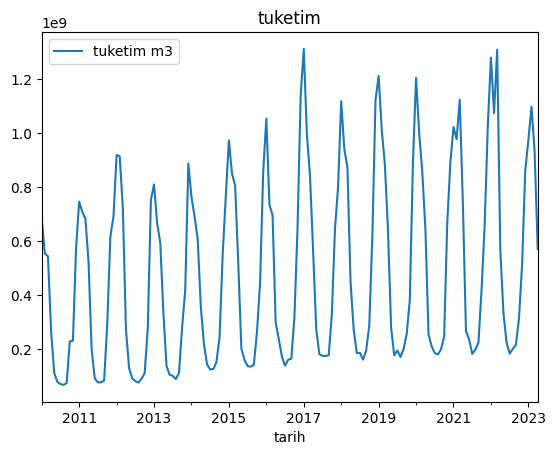

In [9]:
df[['tuketim m3']].plot(title='tuketim')
plt.show()

In [10]:
df.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01', '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01', '2010-09-01', '2010-10-01',
               ...
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01'], dtype='datetime64[ns]', name='tarih', length=160, freq=None)

In [11]:
train = df[:'2022-06-01']
test = df['2022-07-01':]

In [12]:
len(test)

10

In [13]:
#################################
# Triple Exponential Smoothing (Holt-Winters)
#################################

In [14]:
def tes_optimizer(train, abg, step=4):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae

In [15]:
alphas = betas = gammas = np.arange(0.10, 1, 0.20)
abg = list(itertools.product(alphas, betas, gammas))

In [16]:
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg, step=10)

[0.1, 0.1, 0.1, 155410918.93]
[0.1, 0.1, 0.3, 157797384.75]
[0.1, 0.1, 0.5, 154879606.66]
[0.1, 0.1, 0.7, 155125125.19]
[0.1, 0.1, 0.9, 158827207.09]
[0.1, 0.3, 0.1, 202315454.51]
[0.1, 0.3, 0.3, 184058651.48]
[0.1, 0.3, 0.5, 166309638.67]
[0.1, 0.3, 0.7, 166777417.0]
[0.1, 0.3, 0.9, 191669606.42]
[0.1, 0.5, 0.1, 169522154.02]
[0.1, 0.5, 0.3, 144696017.05]
[0.1, 0.5, 0.5, 161410839.55]
[0.1, 0.5, 0.7, 202106725.0]
[0.1, 0.5, 0.9, 181117376.82]
[0.1, 0.7, 0.1, 203918061.47]
[0.1, 0.7, 0.3, 183568368.16]
[0.1, 0.7, 0.5, 157883890.12]
[0.1, 0.7, 0.7, 134153324.55]
[0.1, 0.7, 0.9, 136200720.95]
[0.1, 0.9, 0.1, 230390720.32]
[0.1, 0.9, 0.3, 109561736.38]
[0.1, 0.9, 0.5, 113275669.63]
[0.1, 0.9, 0.7, 123054289.21]
[0.1, 0.9, 0.9, 116236332.11]
[0.3, 0.1, 0.1, 152351654.91]
[0.3, 0.1, 0.3, 162445106.69]
[0.3, 0.1, 0.5, 110826923.28]
[0.3, 0.1, 0.7, 90573948.46]
[0.3, 0.1, 0.9, 117431538.77]
[0.3, 0.3, 0.1, 155643871.61]
[0.3, 0.3, 0.3, 145605269.79]
[0.3, 0.3, 0.5, 93826478.59]
[0.3, 0.3, 0.7

In [17]:
tes_model = ExponentialSmoothing(train, trend="mul", seasonal="mul", seasonal_periods=10).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

In [18]:
y_pred = tes_model.forecast(10)

In [19]:
def plot_prediction(y_pred, label):
    plt.figure(figsize=(15, 9))
    train["tuketim m3"].plot(legend=True, label="TRAIN")
    test["tuketim m3"].plot(legend=True, label="TEST")
    y_pred.plot(legend=True, label="PREDICTION")
    plt.title("Train, Test and Predicted Test Using "+label)
    plt.show()


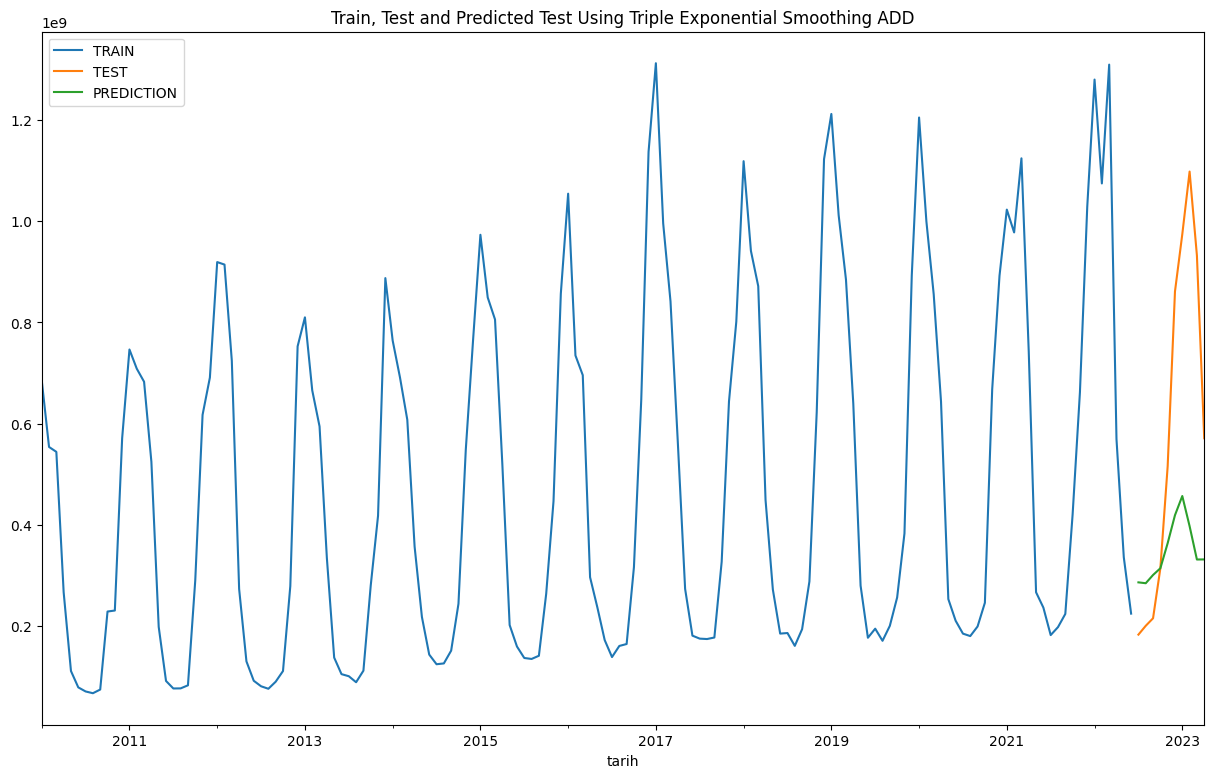

In [20]:
plot_prediction(y_pred, "Triple Exponential Smoothing ADD")

In [21]:
##################################################
# SARIMA
##################################################

In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [23]:
def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), float("inf"), None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarimax_model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = sarimax_model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, aic))
            except:
                continue
    print('SARIMA{}x{}12 - AIC:{}'.format(best_order, best_seasonal_order, best_aic))
    return best_order, best_seasonal_order

best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1233182951529709.8
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6414.02887176837
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5543.577509583316
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5543.812789456252
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6062.284182143627
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6036.46468826721
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5547.047157244218
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5548.973288872476
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6371.233915369399
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6347.875955029894
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5524.655140141173
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5513.753219950536
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6333.2698794879325
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6333.194125432085
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5512.8047979628245
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5514.759063991754
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:6139.269726403363
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:6095.6406

In [24]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)
y_pred_test = sarima_final_model.get_forecast(steps=10)

y_pred = y_pred_test.predicted_mean
mean_absolute_error(test, y_pred)

122907515.1545662

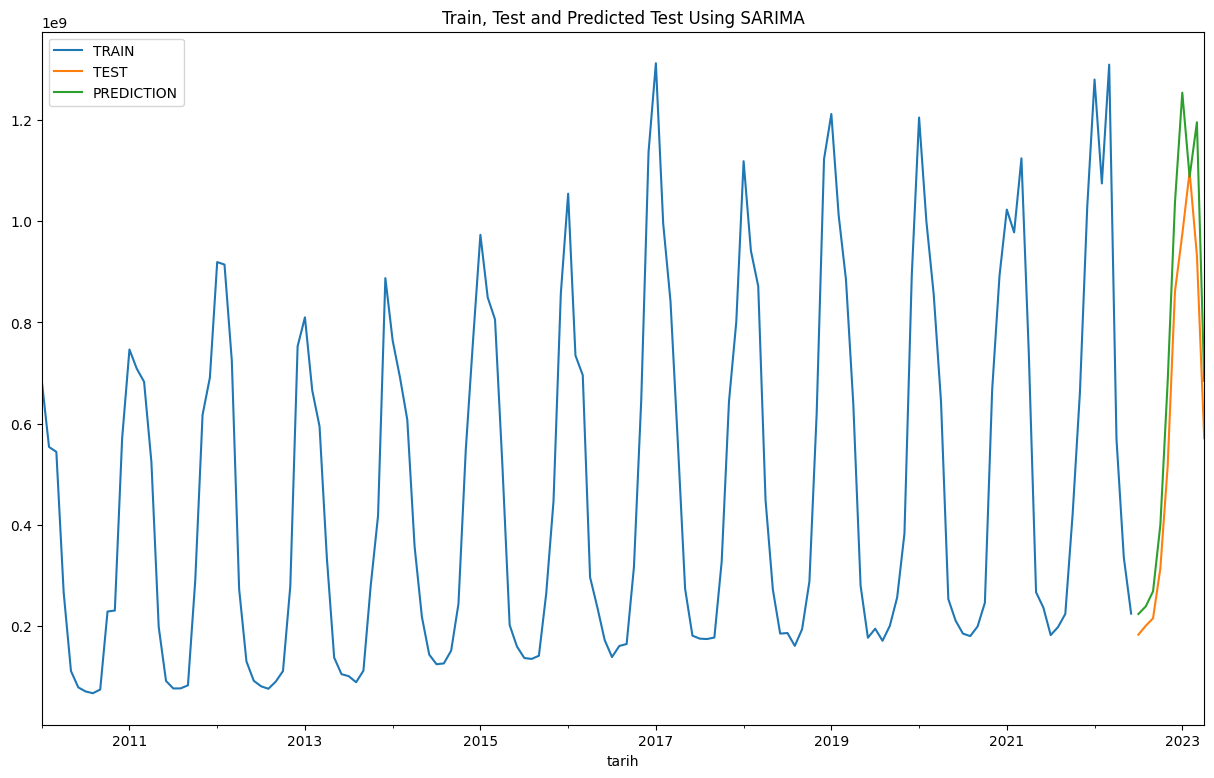

In [25]:
plot_prediction(pd.Series(y_pred, index=test.index), "SARIMA")

In [26]:
# MAE Iteration

In [27]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [28]:
def sarima_optimizer_mae(train, pdq, seasonal_pdq):
    best_mae, best_order, best_seasonal_order = float("inf"), float("inf"), None

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=10)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)

                # mae = fit_model_sarima(train, val, param, param_seasonal)

                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print('SARIMA{}x{}12 - MAE:{}'.format(param, param_seasonal, mae))
            except:
                continue
    print('SARIMA{}x{}12 - MAE:{}'.format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order

best_order, best_seasonal_order = sarima_optimizer_mae(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MAE:586420578.7
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MAE:313447745.228742
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MAE:114115832.4
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MAE:106576508.71832667
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MAE:107488615.73937389
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MAE:83070227.57156418
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MAE:106721896.88869712
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:108889545.59168573
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MAE:606647404.2316084
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MAE:348922180.68495786
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MAE:115933635.29102306
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MAE:100432122.19114059
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MAE:89213069.5737336
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MAE:85361456.2593374
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - MAE:103025973.80582076
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MAE:101986242.91433084
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MAE:377386229.7
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MAE:211497746.4590777
SARI

In [29]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_final_model = model.fit(disp=0)
y_pred_test = sarima_final_model.get_forecast(steps=10)
y_pred = y_pred_test.predicted_mean
mean_absolute_error(test, y_pred)

43102297.271343626

In [56]:
from sklearn.metrics import r2_score
r2 = r2_score(test['tuketim m3'], y_pred)
print("R-kare değeri:", r2)

R-kare değeri: 0.9538094386239854


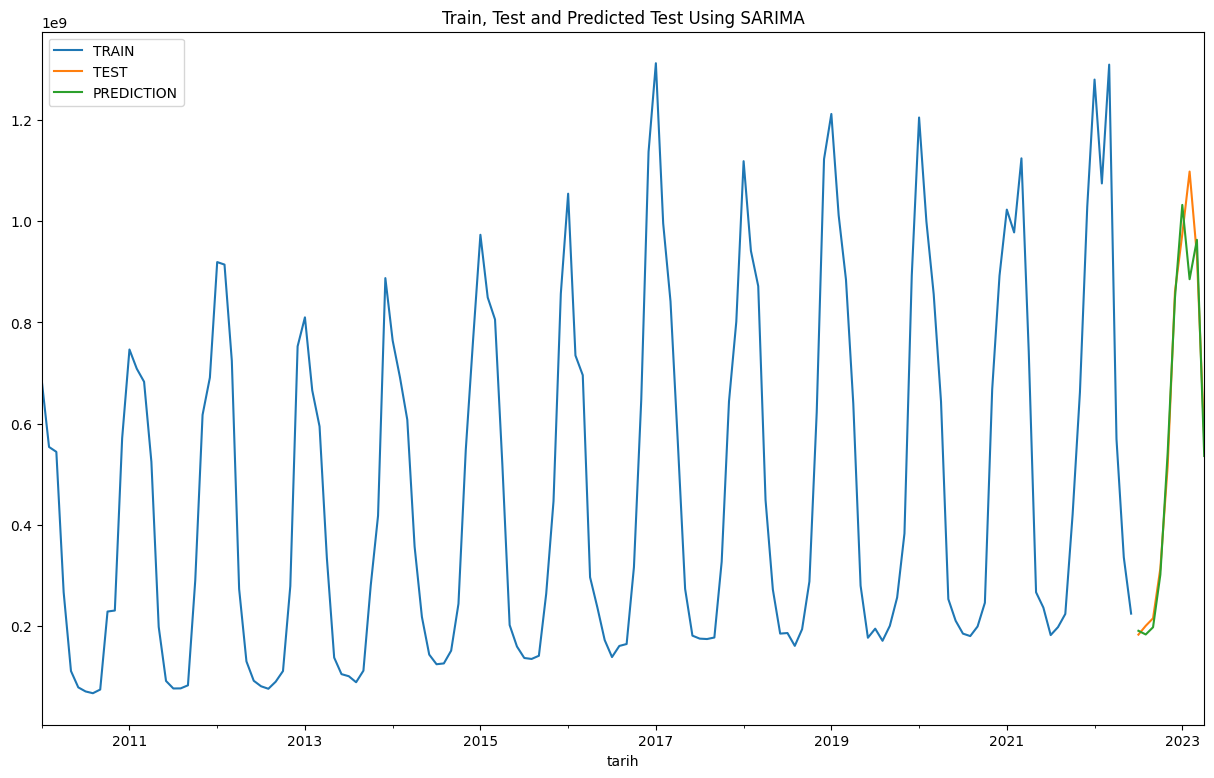

In [30]:
plot_prediction(pd.Series(y_pred, index=test.index), "SARIMA")

In [31]:
# Final model

In [40]:
tes_model_final = ExponentialSmoothing(df, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=best_alpha, smoothing_slope=best_beta, smoothing_seasonal=best_gamma)

df_forecast = tes_model_final.forecast(50)

<Axes: >

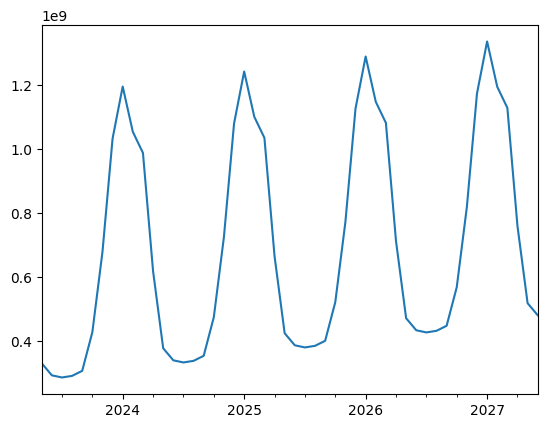

In [41]:
df_forecast.plot()

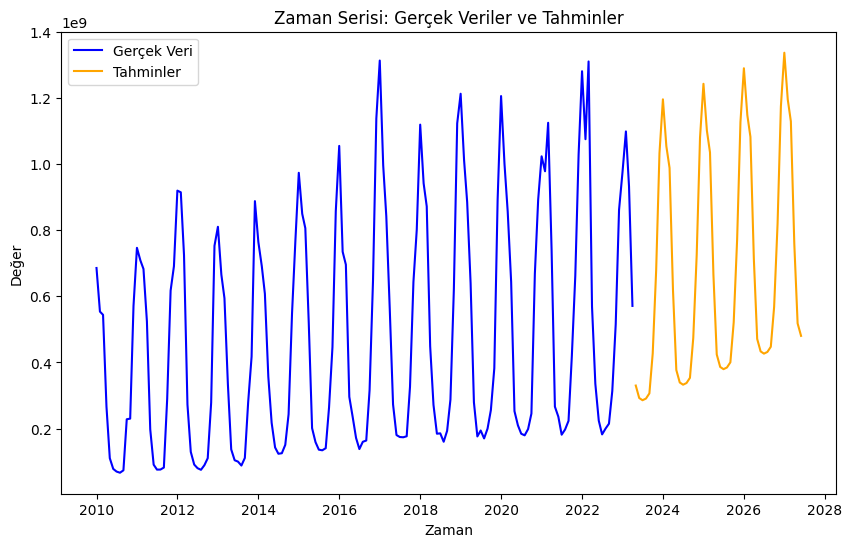

In [54]:
import matplotlib.pyplot as plt

# Grafik oluştur
plt.figure(figsize=(10, 6))

# Orijinal veriyi çiz
plt.plot(df.index, df, label='Gerçek Veri', color='blue')

# Tahmin edilen veriyi çiz
# Tahminler, orijinal verilerin bittiği noktadan itibaren başlıyor
plt.plot(df_forecast.index, df_forecast, label='Tahminler', color='orange')

# Grafik başlık ve etiketler
plt.title('Zaman Serisi: Gerçek Veriler ve Tahminler')
plt.xlabel('Zaman')
plt.ylabel('Değer')

# Legend (açıklama) ekle
plt.legend()

# Grafiği göster
plt.show()
